In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))


In [5]:
linear_svm_model = LinearSVC(max_iter=10000)
linear_svm_model.fit(X_train[:, :2], y_train)  # Using only the first two features for visualization


/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(max_iter=10000)

In [6]:
Z_linear = linear_svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)

In [7]:
nonlinear_svm_model = SVC(kernel='rbf', C=1, gamma='scale')
nonlinear_svm_model.fit(X_train[:, :2], y_train)

SVC(C=1)

In [8]:
Z_nonlinear = nonlinear_svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_nonlinear = Z_nonlinear.reshape(xx.shape)

Text(0.5, 1.0, 'LinearSVC Decision Boundary')

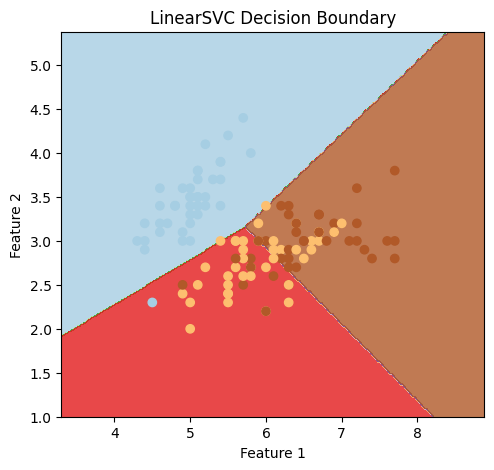

In [9]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z_linear, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('LinearSVC Decision Boundary')

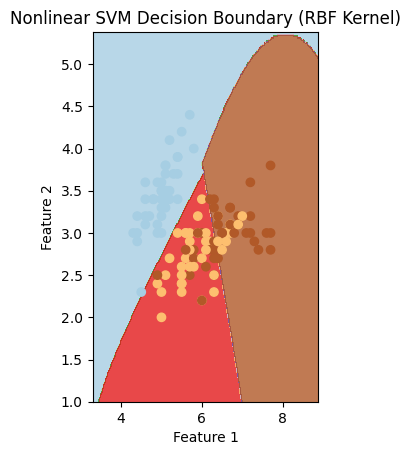

In [10]:
plt.subplot(122)
plt.contourf(xx, yy, Z_nonlinear, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Nonlinear SVM Decision Boundary (RBF Kernel)')

plt.show()